In [103]:
import pandas as pd

In [104]:
data=pd.read_csv('C:\\Users\\HP\\Downloads\\Data analysis\\911.csv')

In [105]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [65]:
data.shape

(423909, 9)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 21.0+ MB


In [67]:
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

### 1.How many different type of calls?

In [106]:
data['title'].head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [107]:
data['call_type']=data['title'].apply(lambda x :x.split(':')[0])

In [108]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [71]:
data['call_type'].nunique()

3

In [109]:
data['call_type'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [73]:
call_types=data['call_type'].value_counts()

In [110]:
import matplotlib.pyplot as plt


In [111]:
import seaborn as sns


In [112]:
sns.set()

In [113]:
from decimal import Decimal


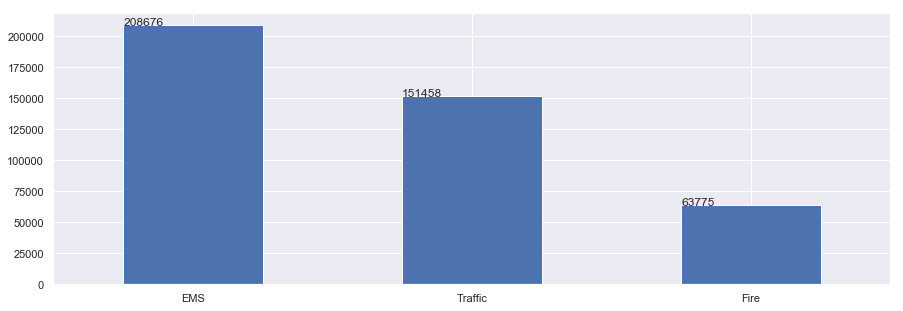

In [120]:
plt.figure(figsize=(15, 5))
ax = call_types.plot(kind='bar')
for p in ax.patches:
    ax.annotate(Decimal(str(p.get_height())), (p.get_x(), p.get_height()))
plt.xticks(rotation=0)
plt.savefig("type_of_call.png")

### 2.Extract Date and Time regarding calls

In [76]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])

In [77]:
data['timeStamp'].head()

0   2015-10-12 17:10:00
1   2015-10-12 17:29:00
2   2015-10-12 14:39:00
3   2015-10-12 16:47:00
4   2015-10-12 16:56:00
Name: timeStamp, dtype: datetime64[ns]

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 10 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null datetime64[ns]
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
call_type    423909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 24.3+ MB


In [79]:
import datetime as dt

In [80]:
data['Year']=data['timeStamp'].dt.year

In [81]:
data['Month']=data['timeStamp'].dt.month_name()

In [82]:
data['Hour']=data['timeStamp'].dt.hour

In [83]:
data['day']=data['timeStamp'].dt.day_name()

In [84]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,Month,Hour,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,October,17,Monday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,October,17,Monday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,2015,October,14,Monday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,October,16,Monday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,October,16,Monday


### 3.At what time of day/month I can expect which type of call

In [85]:
data['emergency_type'] = data['title'].apply(lambda x:x.split(':')[1])


In [86]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,Month,Hour,day,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,October,17,Monday,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,October,17,Monday,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,2015,October,14,Monday,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,October,16,Monday,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,October,16,Monday,DIZZINESS


In [87]:
calls_data = data.groupby(['Month', 'call_type'])['call_type'].count()

In [88]:
calls_data_percentage = calls_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))


In [89]:
calls_data_percentage.head()


Month   call_type
April   EMS          51.0
        Fire         15.0
        Traffic      34.0
August  EMS          50.0
        Fire         15.0
Name: call_type, dtype: float64

In [90]:
calls_data_percentage = calls_data_percentage.reindex(['EMS', 'Traffic', 'Fire'], level=1)


In [91]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [92]:
calls_data_percentage = calls_data_percentage.reindex(month_order, level=0)


In [93]:
calls_data_percentage.head()


Month     call_type
January   EMS          50.0
          Traffic      36.0
          Fire         14.0
February  EMS          47.0
          Traffic      37.0
Name: call_type, dtype: float64

In [94]:
font = {
    'size': 'x-large',
    'weight': 'bold'
}

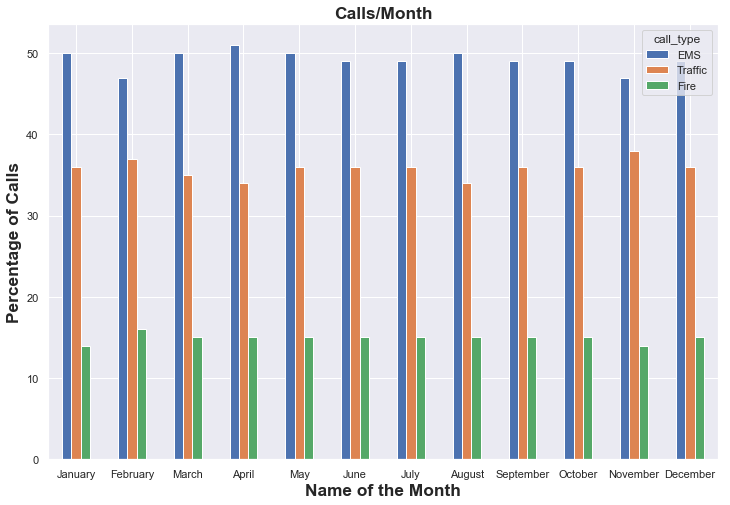

In [115]:
sns.set(rc={'figure.figsize':(12, 8)})
calls_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the Month', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Month', fontdict=font)
plt.savefig('call-month.png')

In [ ]:
hours_data = data.groupby(['Hour', 'call_type'])['call_type'].count()


In [ ]:
hours_data.head()


In [ ]:
hours_data_percentage = hours_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [ ]:
hours_data_percentage.head()

In [ ]:
hours_data_percentage = hours_data_percentage.reindex(['EMS', 'Traffic', 'Fire'], level=1)


In [ ]:
hours_data_percentage.head()

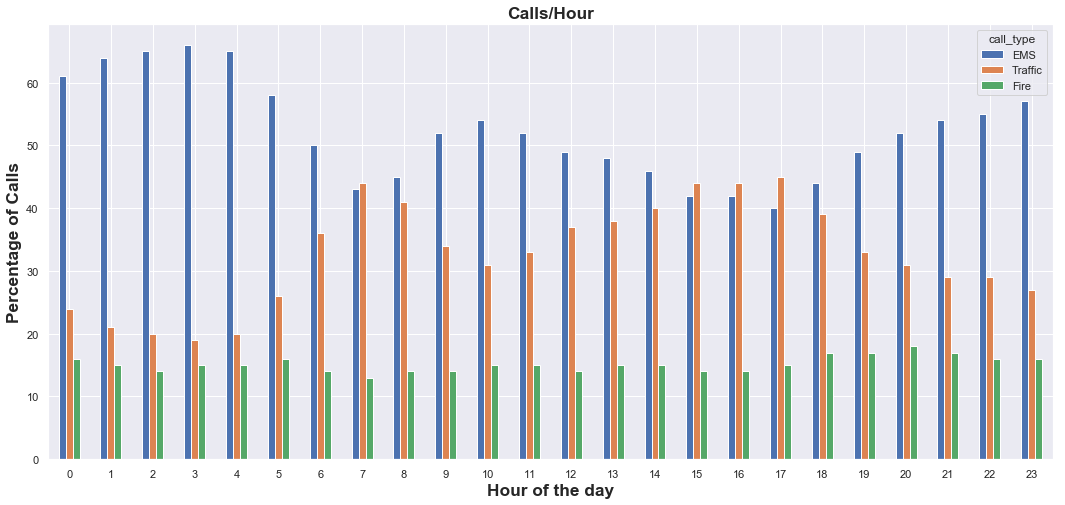

In [116]:
sns.set(rc={'figure.figsize':(18, 8)})
hours_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Hour of the day', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Hour', fontdict=font)
plt.savefig('call-hour.png')

### 4.Visualize percentage share of emergency type for each call

In [ ]:
data.head()

In [ ]:
ems_data = data[data['call_type'] == 'EMS']['emergency_type'].value_counts()[:5]

In [ ]:
fire_data = data[data['call_type'] == 'Fire']['emergency_type'].value_counts()[:5]

In [ ]:
traffic_data = data[data['call_type'] == 'Traffic']['emergency_type'].value_counts()[:5]

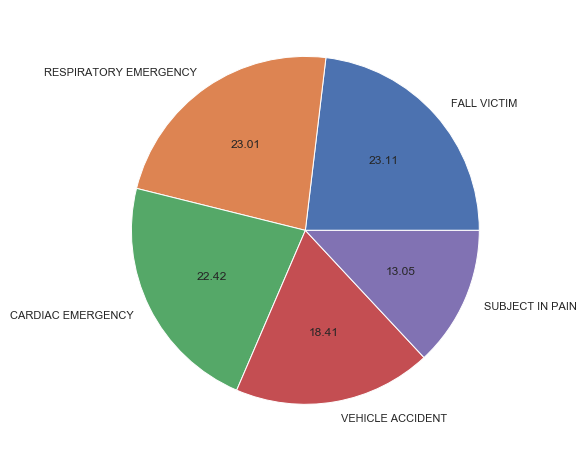

In [117]:
plt.pie(ems_data, labels=ems_data.index, autopct="%.2f")
plt.savefig('Ems-calls.png')

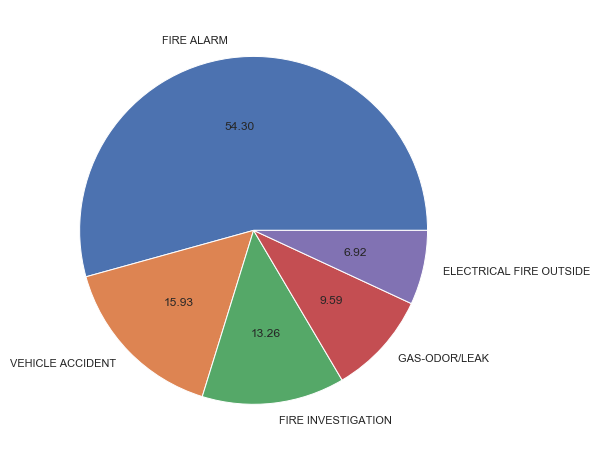

In [118]:
plt.pie(fire_data, labels=fire_data.index, autopct="%.2f")
plt.savefig('Fire-calls.png')

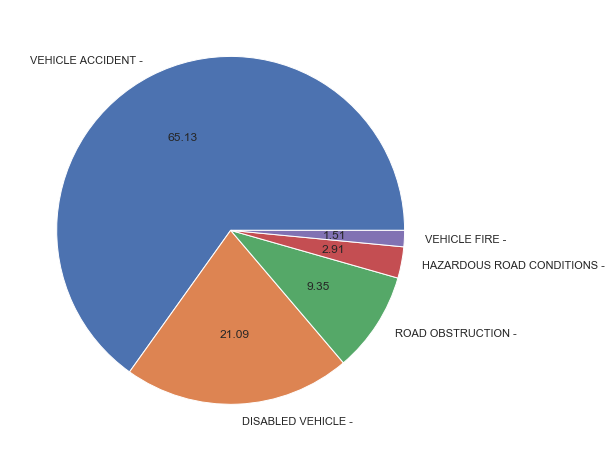

In [119]:
plt.pie(traffic_data, labels=traffic_data.index, autopct="%.2f")
plt.savefig('Traffic-calls.png')